In [1]:
import numpy as np
import scipy.fft
from scipy.constants import pi
import time
import matplotlib.pyplot as plt

### Discrete Fourier Transform

$$F_n = \sum_{k=0}^{N-1} f_k e^{-2\pi ink / N}$$

Matvec:

$$F = A * f$$

where $A$ is an $N \times N$ matrix constructed from $e^{-2\pi ink / N}$ where $k = 0, 1, ..., N-1$ is incremented along the columns and $n = 0, 1, ..., N-1$ is incremented along the rows.

In [2]:
def dft(x):
    N = len(x)
    
#     A = np.zeros((N, N), dtype=complex)
#     for n in range(N):
#         for k in range(N):
#             A[n, k] = np.exp((-2 * pi * 1j * n * k) / N)
    
    a1 = np.arange(0, N, 1).reshape(N, 1)
    a2 = np.arange(0, N, 1).reshape(1, N)
    A =  np.matmul(a1, a2)
    A = np.exp((-2 * pi * 1j * A) / N)
    
    mvFt = np.matmul(A, x)
    return mvFt

In [29]:
Narr = np.arange(300, 16000, 200)
tMatvec = np.zeros(len(Narr))
tFFT = np.zeros(len(Narr))
for i in range(len(Narr)):
    N = Narr[i]
    v = np.linspace(0, 100, N)
    t1 = time.time()
    mvFt = dft(v)
    t2 = time.time()
    fft = scipy.fft.fft(v)
    t3 = time.time()
    tMatvec[i] = t2 - t1
    tFFT[i] = t3 - t2
    if(not np.allclose(mvFt, fft)):
        raise Exception("That was bad")

Text(0, 0.5, 'Time (seconds)')

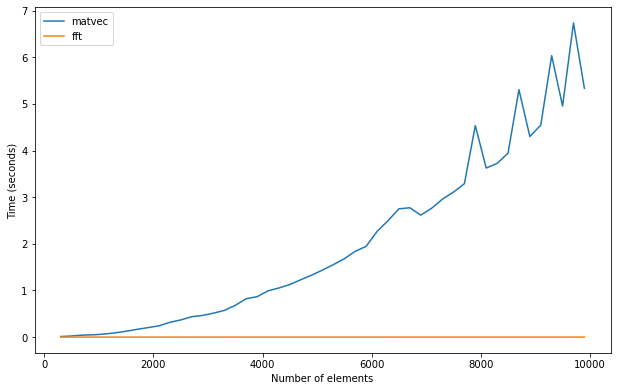

In [4]:
fig = plt.figure(figsize=(10,6))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.plot(Narr, tMatvec, label='matvec')
axes.plot(Narr, tFFT, label='fft')
axes.legend()
axes.set_xlabel('Number of elements')
axes.set_ylabel('Time (seconds)')

In [5]:
print('total matvec time: {:.3f} s'.format(np.sum(tMatvec)))
print('total fft time: {:.3f} s'.format(np.sum(tFFT)))

total matvec time: 98.293 s
total fft time: 0.010 s


In [3]:
Narr = np.arange(300, 10000, 200)
tMatvec = np.zeros(len(Narr))
tFFT = np.zeros(len(Narr))
for i in range(len(Narr)):
    N = Narr[i]
    v = 2 * np.pi * np.random.uniform(size=N)
    t1 = time.time()
    mvFt = dft(v)
    t2 = time.time()
    fft = scipy.fft.fft(v)
    t3 = time.time()
    tMatvec[i] = t2 - t1
    tFFT[i] = t3 - t2
    if(not np.allclose(mvFt, fft)):
        raise Exception("That was bad")